In [9]:
import torch
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rcParams["font.sans-serif"] = ["SimHei"]  # 用来正常显示中文标签
plt.rcParams["axes.unicode_minus"] = False  # 用来正常显示负号

# 激活函数

目的：
    给模型增加非线性功能，让模型（神经元）既可以做分类，还可以做回归问题
分类：
- Sigmoid
- Tanh
- ReLU
- Leaky ReLU
- Softmax

# sigmoid 函数图像

sigmoid 函数主要应用于二分类的输出层，且适用于浅层神经网络（不超过 5 层）

$$
    \sigma(x) = \frac{1}{1 + e^{-x}}
$$


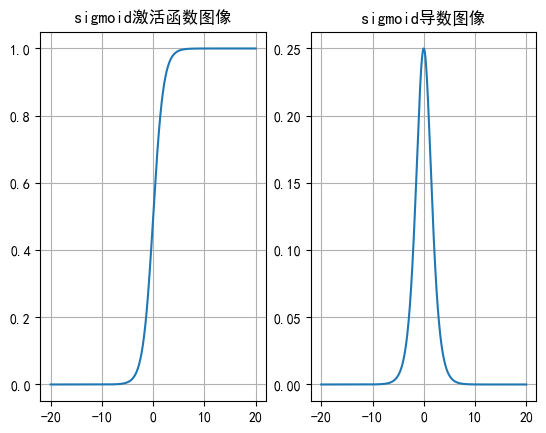

In [10]:
"""绘制sigmoid函数图像"""

# 1.创建画布和坐标，1行2列
fig, axes = plt.subplots(1, 2)

# 2.生成-20到20之间的1000个数据点
x = torch.linspace(-20, 20, 1000)

# 3. 计算上述1000个点的sigmoid函数值
y = torch.sigmoid(x)

axes[0].plot(x, y)
axes[0].set_title('sigmoid激活函数图像')
axes[0].grid()

"""绘制sigmoid导数图像"""
# 重新生成-20到20之间的1000个数据点
x = torch.linspace(-20, 20, 1000, requires_grad=True)

# 具体计算sigmoid导数的值
torch.sigmoid(x).sum().backward()

axes[1].plot(x.detach(), x.grad)
axes[1].set_title('sigmoid导数图像')
axes[1].grid()
plt.show()

求导后，sigmoid 函数的导数范围为[0, 0.25]，在[-3, 3]之间的点导数最大为 0.25，而在[-6, 6]之外的点导数为 0，所以特征数据在[-6, 6]之间有效果，在[-3, 3]之间效果最佳

# Tanh 函数图像

Tanh 函数主要应用于隐藏层，且适用于浅层神经网络（不超过 5 层）

$$
\tanh(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}
$$

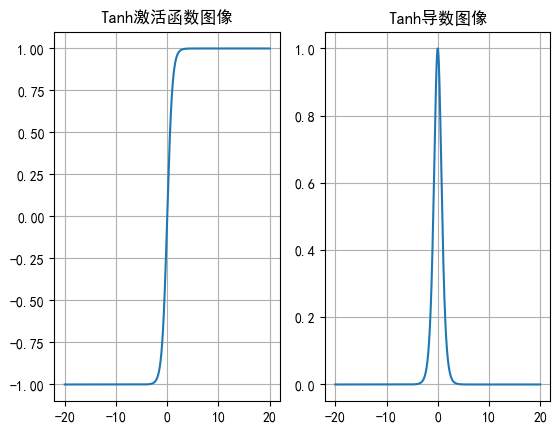

In [20]:
"""绘制Tanh函数图像"""

# 1.创建画布和坐标，1行2列
fig, axes = plt.subplots(1, 2)

# 2.生成-20到20之间的1000个数据点
x = torch.linspace(-20, 20, 1000)

# 3. 计算上述1000个点的Tanh函数值
y = torch.tanh(x)

axes[0].plot(x, y)
axes[0].set_title("Tanh激活函数图像")
axes[0].grid()

"""绘制Tanh导数图像"""
# 重新生成-20到20之间的1000个数据点
x = torch.linspace(-20, 20, 1000, requires_grad=True)

# 具体计算Tanh导数的值
torch.tanh(x).sum().backward()

axes[1].plot(x.detach(), x.grad)
axes[1].set_title("Tanh导数图像")
axes[1].grid()
plt.show()

Tanh函数的输出范围为[-1, 1]，而sigmoid函数的输出范围为[0, 1]，所以Tanh函数的输出值更接近于0，而sigmoid函数的输出值更接近于0.5

Tanh函数的导数范围为[0, 1]，在[-1, 1]区间内，在[-1, 1]区间导数最大值为1，所以特征数据在[-1, 1]区间内有效果，收敛速度比sigmoid函数快

# RelU 函数图像

RelU 函数将小于 0 的值映射为 0，大于等于 0 的值映射为本身，它更加重视正信号，而忽略负信号

ReLU 函数计算量相对较小，训练成本低，多应用于隐藏层，且适合深层神经网络，求导后要么是 0，要么是 1，较之于Tach，收敛速度更快
$$
    \text{RelU}(x) = \max(0, x)
$$


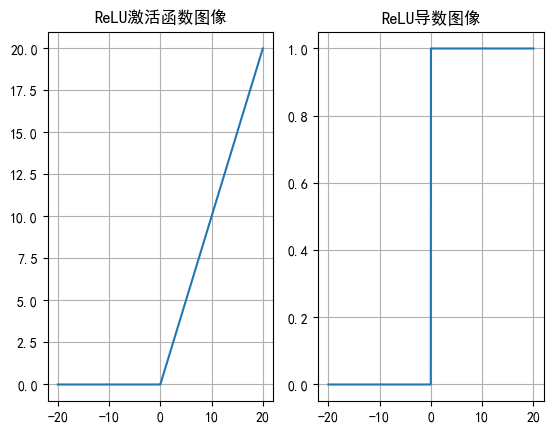

In [14]:
# 1.创建画布和坐标，1行2列
fig, axes = plt.subplots(1, 2)

# 2.生成-20到20之间的1000个数据点
x = torch.linspace(-20, 20, 1000)

# 3. 计算上述1000个点的Tanh函数值
y = torch.relu(x)

axes[0].plot(x, y)
axes[0].set_title("ReLU激活函数图像")
axes[0].grid()

"""绘制ReLU导数图像"""
# 重新生成-20到20之间的1000个数据点
x = torch.linspace(-20, 20, 1000, requires_grad=True)

# 具体计算ReLU导数的值
torch.relu(x).sum().backward()

axes[1].plot(x.detach(), x.grad)
axes[1].set_title("ReLU导数图像")
axes[1].grid()
plt.show()

# Softmax 函数

softmax用于多分类问题，将输出转换为概率分布

In [19]:
# 1.定义张量，记录分类数据
scores = torch.tensor([0.2, 0.02, 0.15, 0.15, 1.3, 0.5, 0.06, 1.1, 0.05, 3.75])
# 2. dim=0, 按行计算
probabilities = torch.softmax(scores, dim=0)
print(probabilities)
print(probabilities.sum())
scores = torch.tensor([[0.2, 0.3, 0.1], [0.11, 0.35, 0.6]])
probabilities = torch.softmax(scores, dim=1) # 按列计算
print(probabilities)
print(probabilities[0].sum())

tensor([0.0212, 0.0177, 0.0202, 0.0202, 0.0638, 0.0287, 0.0185, 0.0522, 0.0183,
        0.7392])
tensor(1.0000)
tensor([[0.3322, 0.3672, 0.3006],
        [0.2562, 0.3257, 0.4182]])
tensor(1.)


# 总结
对于隐藏层：
1. 优先选择ReLU激活函数
2. 如果ReLu函数效果不好，尝试使用LeakyReLU、PReLU激活函数
3. 如果使用了ReLU函数，需要注意避免出现“死亡ReLU”问题，避免出现0梯度从而导致过多的神经元死亡
4. 少使用sigmoid函数，可以尝试使用tanh函数


对于输出层：
1. 二分类问题，使用sigmoid函数
2. 多分类问题，使用softmax函数
3. 回归问题，使用identity激活函数